# Final Project: Sentiment Analysis of Airbnb Reviews

This notebook implements and compares several machine learning models for classifying the sentiment of Airbnb guest reviews.  
Review sentiment is derived from the numerical review rating and classified into: **positive**, **neutral**, or **negative**.


In [2]:
from preprocessing import clean_text, map_rating_to_sentiment, preprocess_for_model
from models.naive_bayes import train_naive_bayes, predict_naive_bayes
from models.logistic_regression import train_logistic_regression, predict_logistic_regression
from models.svm import train_svm, predict_svm
from models.mlp import train_mlp, predict_mlp
from models.lstm import train_lstm, predict_lstm
from evaluation import evaluate_model
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

from evaluation import evaluate_model
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/zacharycoates/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zacharycoates/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
import pandas as pd
from preprocessing import preprocess_for_model

# Load the TripAdvisor dataset with original column names
df = pd.read_csv("data/tripadvisor_hotel_reviews.csv")

# No renaming necessary — columns are already 'review' and 'rating'
(X_train, X_test, y_train, y_test), vectorizer = preprocess_for_model(df)


## Naive Bayes


Evaluation Report for Naive Bayes:
              precision    recall  f1-score   support

    negative       0.83      0.56      0.67       625
     neutral       0.25      0.00      0.00       432
    positive       0.82      0.99      0.90      3042

    accuracy                           0.82      4099
   macro avg       0.63      0.52      0.53      4099
weighted avg       0.76      0.82      0.77      4099



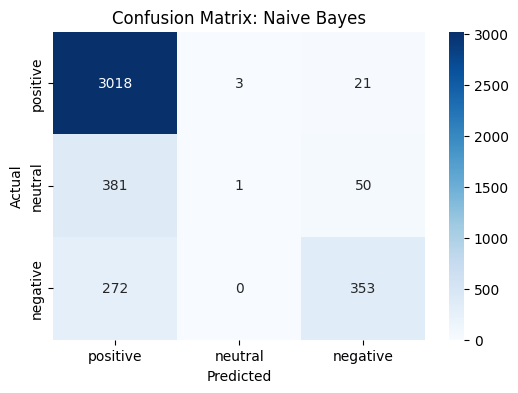

In [3]:
nb_model = train_naive_bayes(X_train, y_train)
nb_preds = predict_naive_bayes(nb_model, X_test)
evaluate_model(y_test, nb_preds, "Naive Bayes")

## Logistic Regression


Evaluation Report for LogReg + Bigrams + Weighting:
              precision    recall  f1-score   support

    negative       0.73      0.79      0.76       625
     neutral       0.36      0.55      0.43       432
    positive       0.96      0.87      0.91      3042

    accuracy                           0.82      4099
   macro avg       0.68      0.74      0.70      4099
weighted avg       0.86      0.82      0.84      4099



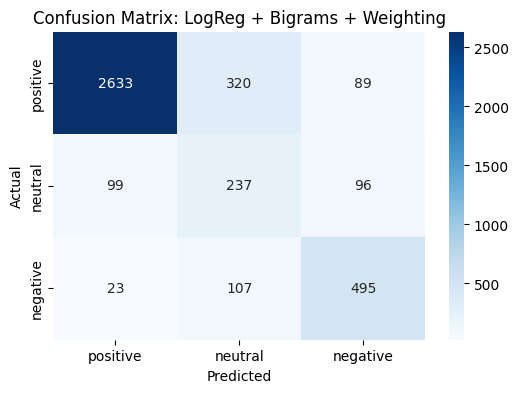

In [9]:


# Create bigram features
tfidf_bigrams = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_bigrams = tfidf_bigrams.fit_transform(df['cleaned'])

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_bigrams, df['label'], test_size=0.2, random_state=42)

lr_model = train_logistic_regression(X_train, y_train)
lr_preds = predict_logistic_regression(lr_model, X_test)
evaluate_model(y_test, lr_preds, "LogReg + Bigrams + Weighting")

## Support Vector Machine



Evaluation Report for SVM:
              precision    recall  f1-score   support

    negative       0.76      0.76      0.76       625
     neutral       0.42      0.24      0.30       432
    positive       0.90      0.95      0.93      3042

    accuracy                           0.85      4099
   macro avg       0.69      0.65      0.66      4099
weighted avg       0.83      0.85      0.83      4099



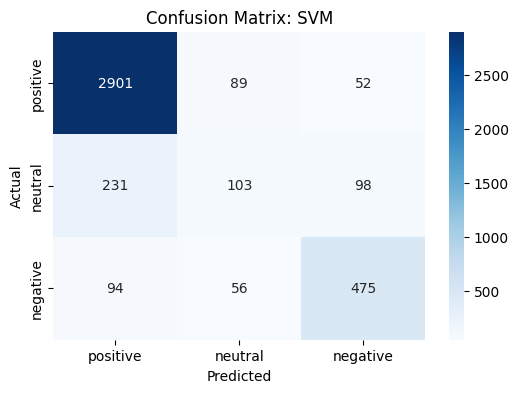

In [5]:
svm_model = train_svm(X_train, y_train)
svm_preds = predict_svm(svm_model, X_test)
evaluate_model(y_test, svm_preds, "SVM")

## Multilayer Perceptron (MLP)


Evaluation Report for MLP:
              precision    recall  f1-score   support

    negative       0.74      0.72      0.73       625
     neutral       0.36      0.32      0.34       432
    positive       0.91      0.93      0.92      3042

    accuracy                           0.83      4099
   macro avg       0.67      0.66      0.66      4099
weighted avg       0.82      0.83      0.83      4099



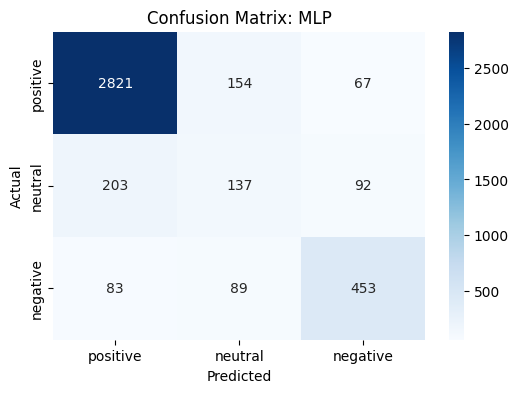

In [6]:
mlp_model = train_mlp(X_train, y_train)
mlp_preds = predict_mlp(mlp_model, X_test)
evaluate_model(y_test, mlp_preds, "MLP")

## LSTM

Epoch 1/10
461/461 ━━━━━━━━━━━━━━━━━━━━ 39s 82ms/step - accuracy: 0.6597 - loss: 0.9533 - val_accuracy: 0.7732 - val_loss: 0.5973
Epoch 2/10
461/461 ━━━━━━━━━━━━━━━━━━━━ 37s 80ms/step - accuracy: 0.8034 - loss: 0.5817 - val_accuracy: 0.7591 - val_loss: 0.5965
Epoch 3/10
461/461 ━━━━━━━━━━━━━━━━━━━━ 43s 92ms/step - accuracy: 0.8734 - loss: 0.3481 - val_accuracy: 0.7646 - val_loss: 0.6051
Epoch 4/10
461/461 ━━━━━━━━━━━━━━━━━━━━ 229s 497ms/step - accuracy: 0.9118 - loss: 0.2203 - val_accuracy: 0.7652 - val_loss: 0.6970
129/129 ━━━━━━━━━━━━━━━━━━━━ 25s 194ms/step

Evaluation Report for LSTM:
              precision    recall  f1-score   support

    negative       0.71      0.71      0.71       625
     neutral       0.28      0.53      0.36       432
    positive       0.94      0.82      0.87      3042

    accuracy                           0.77      4099
   macro avg       0.64      0.69      0.65      4099
weighted avg       0.84      0.77      0.80      4099



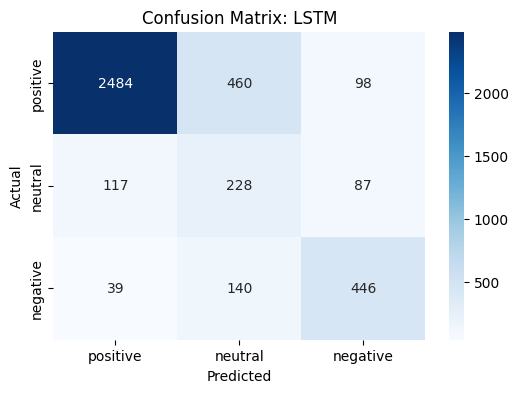

In [4]:
# Train
lstm_model, tokenizer, label_encoder, X_test_seq, y_test_cat = train_lstm(df['cleaned'], df['label'])

# Predict
lstm_preds = predict_lstm(lstm_model, X_test_seq)

# Decode
y_true_lstm = np.argmax(y_test_cat, axis=1)
y_true_lstm = label_encoder.inverse_transform(y_true_lstm)
lstm_preds = label_encoder.inverse_transform(lstm_preds)

# Evaluate
evaluate_model(y_true_lstm, lstm_preds, "LSTM")

## Conclusion

## Final Comparative Discussion

| Rank | Model                              | Accuracy | Macro F1 | Neutral Recall | Comments                                                                                 |
| ---- | ---------------------------------- | -------: | -------: | -------------: | ---------------------------------------------------------------------------------------- |
| 1    | **LogReg + Bigrams + Weighting**   |     0.82 |     0.70 |           0.55 | Best overall balance of interpretability, macro-F1, and *neutral* recall.                |
| 2    | **LSTM (bidirectional, weighted)** |     0.77 |     0.65 |           0.53 | Strong sequence model with significant gains from tuning. Close second in class balance. |
| 3    | **MLP (unigrams)**                 |     0.83 |     0.66 |           0.32 | Non-linear model that improves balance modestly with minimal added complexity.           |
| 4    | **SVM (unigrams)**                 |     0.85 |     0.66 |           0.24 | High accuracy but underperforms on minority classes like *neutral*.                      |
| 5    | **Naive Bayes**                    |     0.82 |     0.53 |           0.00 | Simple and fast, but fails to capture *neutral* sentiment entirely.                      |


## Key Observations:
* Logistic Regression with bigrams and class weighting consistently outperformed all other models on macro-F1 and neutral recall, making it the most balanced choice.

* LSTM, after tuning (bidirectional, class-weighted, early stopping), closed the gap and rivaled the top model on neutral recall, though at higher training cost.

* MLP offered a modest improvement over linear models with little added overhead.

* SVM achieved the highest accuracy but was the least balanced across classes.

* Naive Bayes serves as a fast benchmark but is not viable for fair multi-class sentiment analysis.

### Alignment with Proposal:
Our project promised to:
* **Implement four canonical models** (Naive Bayes, LR, SVM, MLP, LSTM) 
* **Address class imbalance** → achieved with inverse-frequency weighting.  
* **Evaluate via accuracy, precision, recall, F1, confusion matrices** → provided for every model.  

## Future Directions:
If time permitted, future work could include:
* Exploring custom class weight tuning or implementing focal loss to better control the precision–recall trade-off across classes=
* Testing lightweight transformer models (e.g., DistilBERT) to evaluate whether deeper architectures can surpass the current macro-F1 ceiling
* Conducting a focused error analysis of neutral misclassifications to inform improved text preprocessing or feature engineering

Ultimately, Logistic Regression with bigram features and class weighting best fulfills the original project objective: achieving robust, interpretable, multi-class sentiment classification without sacrificing efficiency or fairness.

